In [1]:
import pandas as pd

uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
datos = pd.read_csv(uri)
datos.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [2]:
nuevos_nombres = {
    "mileage_per_year" : "millas",
    "model_year": "anho_modelo",
    "price": "precio",
    "sold": "vendido"
}
datos = datos.rename(columns=nuevos_nombres)
datos.head()

,Unnamed: 0,millas,anho_modelo,precio,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [3]:
cambiar = {
    "no":0,
    "yes":1
}
datos.vendido = datos.vendido.map(cambiar)
datos.head()

,Unnamed: 0,millas,anho_modelo,precio,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [4]:
from datetime import datetime

anho_actual = datetime.today().year

datos['Edad_modelo'] = anho_actual-datos.anho_modelo
datos.head()

datos['km'] = datos.millas*1.60934
datos.head()

,Unnamed: 0,millas,anho_modelo,precio,vendido,Edad_modelo,km
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [5]:
datos = datos.drop(columns = ["Unnamed: 0", "millas", "anho_modelo"], axis=1)
datos.head()

,precio,vendido,Edad_modelo,km
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [6]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np


x = datos[["precio", "Edad_modelo",	"km"]]
y =  datos["vendido"]


SEED = 20
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.25, stratify = y)

modelo = LinearSVC()
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto %.2f " % (acuracia))

Porcentaje de acierto 57.88 


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [7]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier()
dummy.fit(train_x, train_y)
pred = dummy.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto dummy %.2f " % (acuracia))

Porcentaje de acierto dummy 52.20 


/usr/local/lib/python3.6/dist-packages/sklearn/dummy.py:132: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  "stratified to prior in 0.24.", FutureWarning)


In [8]:

dummy_most_frequent = DummyClassifier(strategy= "most_frequent")
dummy_most_frequent.fit(train_x, train_y)
pred = dummy_most_frequent.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto dummy_most_frequent %.2f " % (acuracia))

Porcentaje de acierto dummy_most_frequent 58.00 


In [10]:
from sklearn.preprocessing import StandardScaler

SEED = 20
np.random.seed(SEED)
train_x_raw, test_x_raw, train_y_raw, test_y_raw = train_test_split(x,y,test_size = 0.25, stratify = y)

scaler = StandardScaler()
scaler.fit(train_x_raw)

train_x = scaler.transform(train_x_raw)
test_x = scaler.transform(test_x_raw)

modelo = SVC()
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto %.2f " % (acuracia))

Porcentaje de acierto 75.92 


In [64]:
from sklearn.tree import DecisionTreeClassifier

SEED = 20
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size = 0.25, stratify = y)


modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(train_x, train_y)
pred = modelo.predict(test_x)
acuracia = accuracy_score(test_y, pred) * 100

print("Porcentaje de acierto %.2f " % (acuracia))

Porcentaje de acierto 78.32 


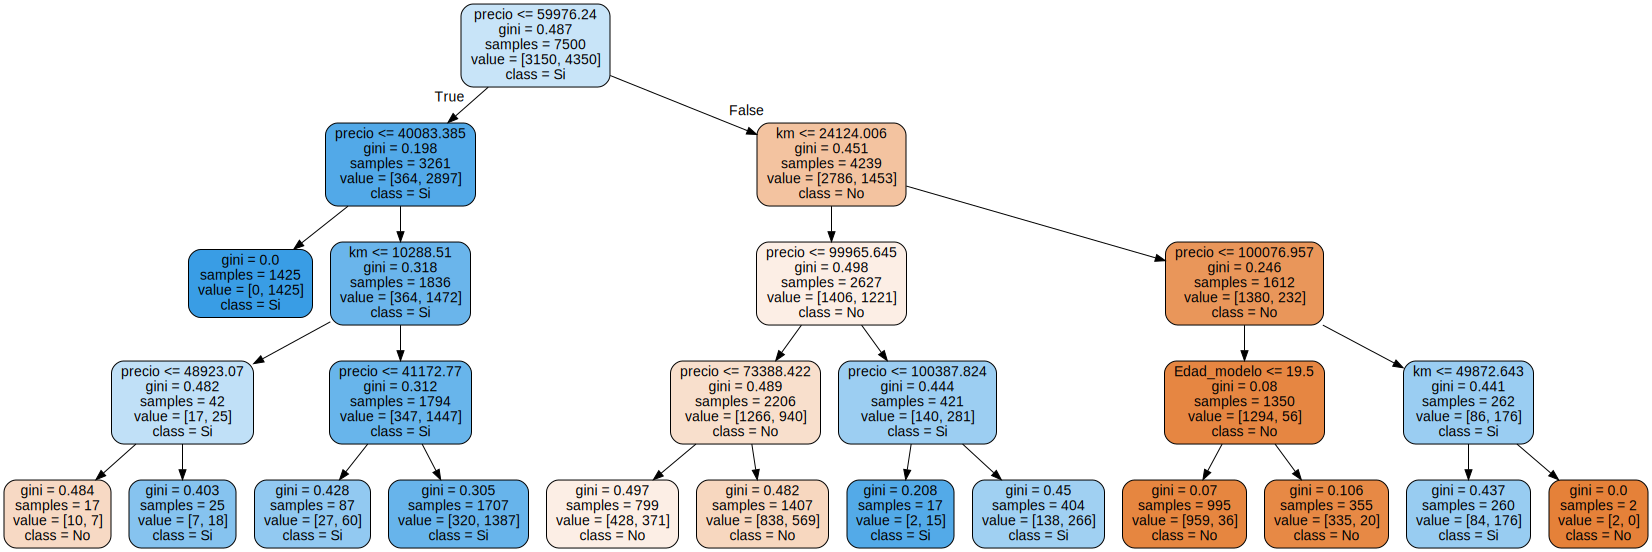

In [65]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(modelo, 
                           feature_names= x.columns,
                           filled = True, 
                           rounded = True,
                           class_names = ["No", "Si"])

#!pip install graphviz
#!apt-get install graphviz

grafico = graphviz.Source(dot_data)
grafico